# Exploratory Data Analysis (EDA) – Heart Disease Dataset

Ce notebook est dédié à l’analyse exploratoire du jeu de données *Heart Disease*.  
L’objectif de cette étape est de comprendre la structure des données, d’identifier les variables pertinentes, de détecter d’éventuelles anomalies (valeurs manquantes, valeurs extrêmes) et d’obtenir des premières intuitions utiles pour la phase de modélisation.

L’analyse exploratoire comprend :
- une étude de la distribution des variables,
- l’identification des valeurs manquantes,
- l’analyse des relations entre les variables explicatives et la variable cible,
- l’étude des corrélations entre variables numériques.

Les conclusions de cette analyse guideront les choix effectués lors du preprocessing et de la modélisation.


## Importation des bibliothèques


In [14]:
import pandas as pd


## Chargement de dataset 

In [15]:
df = pd.read_csv("../dataset.csv")

In [16]:
# Print the first 10 rows of the dataset 
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


## Dimensions du dataset

In [17]:
# Checking the number of rows and columns
df.shape

(920, 16)

## Informations générales

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Aperçu général des données

Le jeu de données contient des variables numériques et catégorielles décrivant
l’état de santé de patients. Certaines variables présentent des valeurs manquantes,
ce qui nécessite une étape de nettoyage avant la modélisation.


## Analyse de valeurs manquantes

In [19]:
df.isnull().mean().sort_values(ascending=False) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64

## Valeurs manquantes

Plusieurs variables contiennent des valeurs manquantes en proportions variables.
Afin de conserver un maximum d’informations, une stratégie d’imputation sera utilisée
plutôt que la suppression des lignes concernées.


## Suppression des variables non pertinentes

La colonne `id` correspond à un identifiant technique et n’apporte aucune information
utile pour la prédiction. Elle est donc supprimée avant la phase de modélisation.


In [20]:
df = df.drop(columns=["id"])

## Analyse de la variable cible


In [21]:
numeric_df = df.select_dtypes(include="number")


In [22]:
df["num"].value_counts(normalize=True) * 100


num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64

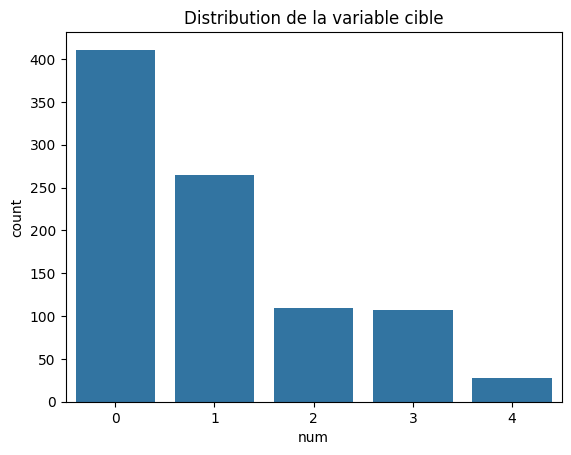

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="num", data=df)
plt.title("Distribution de la variable cible")
plt.show()


L’analyse de la distribution de la variable cible (`num`) montre que le dataset n’est pas parfaitement équilibré. Une classe est légèrement plus représentée que l’autre, ce qui peut influencer les performances des modèles de classification.

Ce déséquilibre, bien que modéré, peut conduire un modèle à privilégier la classe majoritaire, ce qui fausse certaines métriques comme l’accuracy.

## Analyse univariée


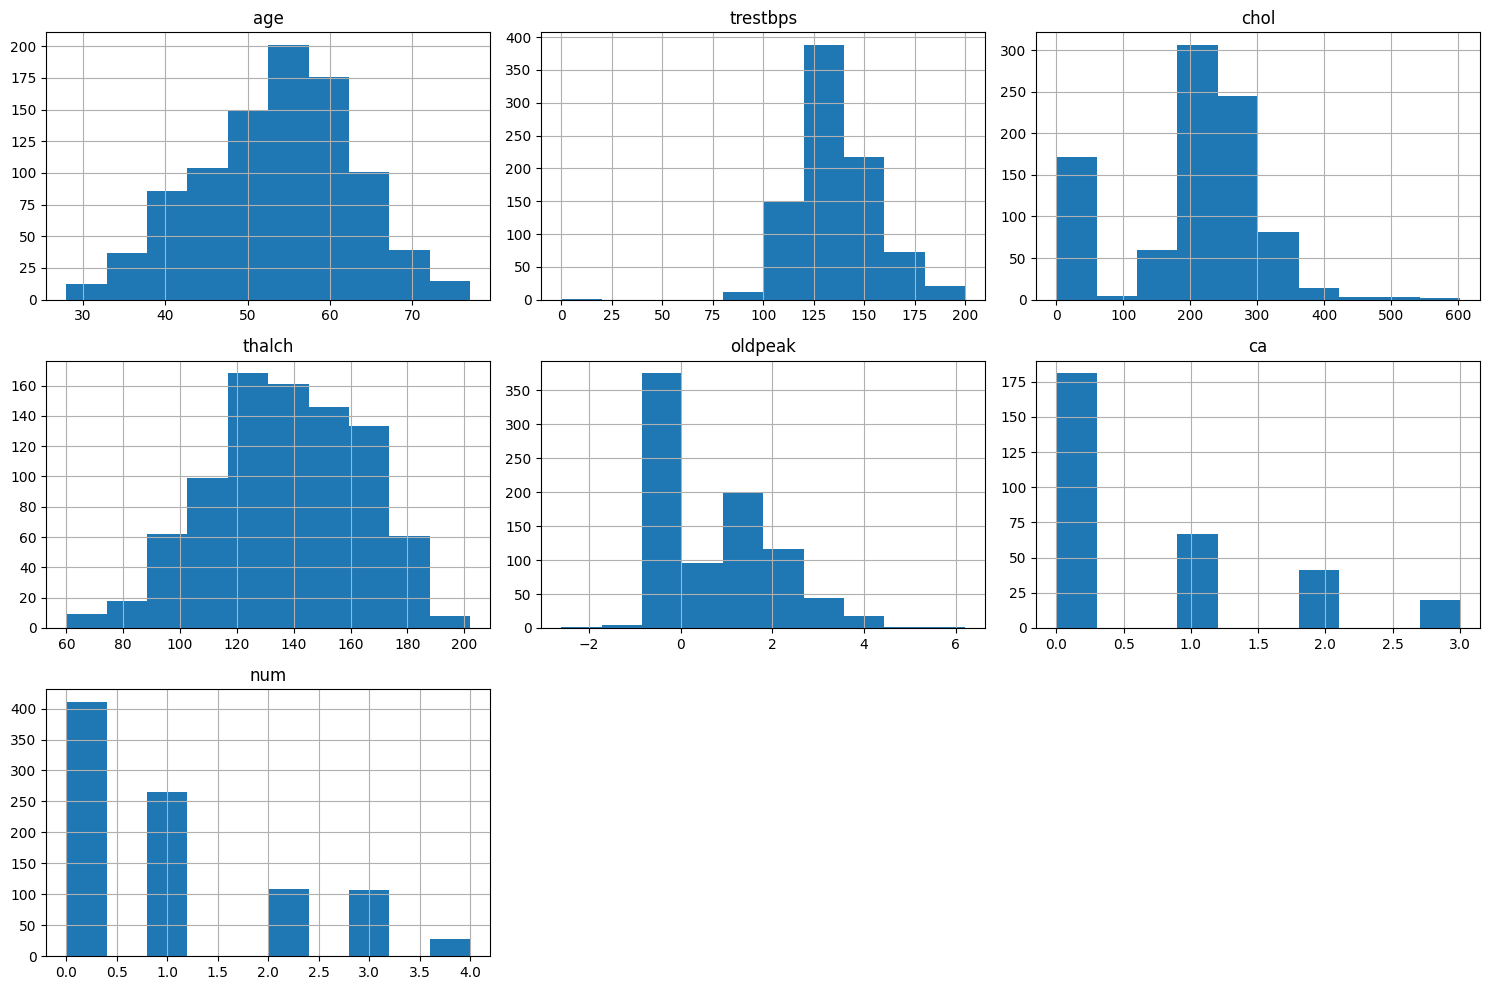

In [24]:
numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


Asymétrie:

Certaines variables présentent une distribution asymétrique, ce qui indique que les valeurs ne sont pas réparties de manière uniforme autour de la moyenne.

Valeurs extrêmes:

Des valeurs extrêmes sont visibles pour plusieurs variables, ce qui peut influencer l’apprentissage de certains modèles.

Plages de valeurs anormales:

Certaines variables couvrent des plages de valeurs très larges, traduisant une forte variabilité entre les observations.

## Analyse bivariée


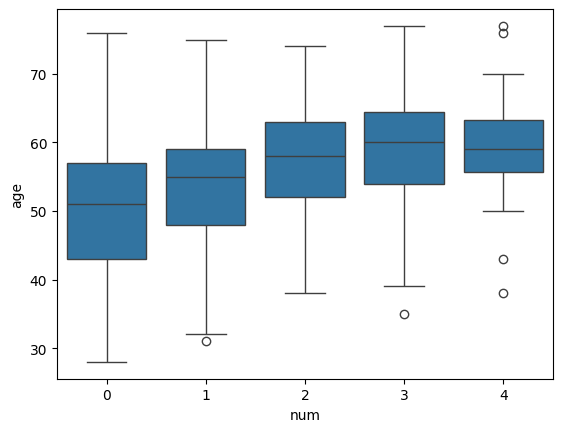

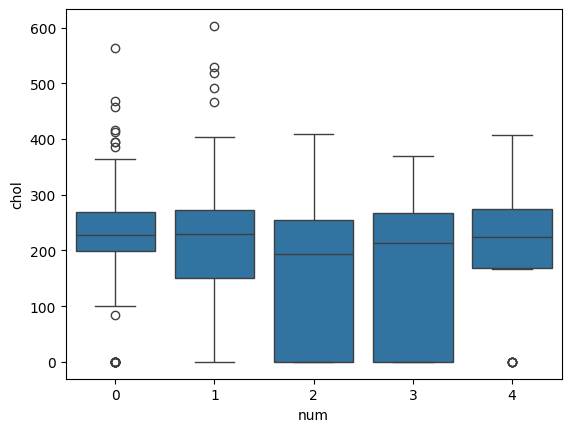

In [25]:
sns.boxplot(x="num", y="age", data=df)
plt.show()

sns.boxplot(x="num", y="chol", data=df)
plt.show()


Variables discriminantes:

Certaines variables montrent des différences visibles entre les classes, ce qui suggère qu’elles sont utiles pour prédire la présence d’une maladie cardiaque.

Intuition pour la modélisation:

Ces observations indiquent que des modèles capables de capturer des relations non linéaires peuvent être plus performants.

## Analyse des corrélations


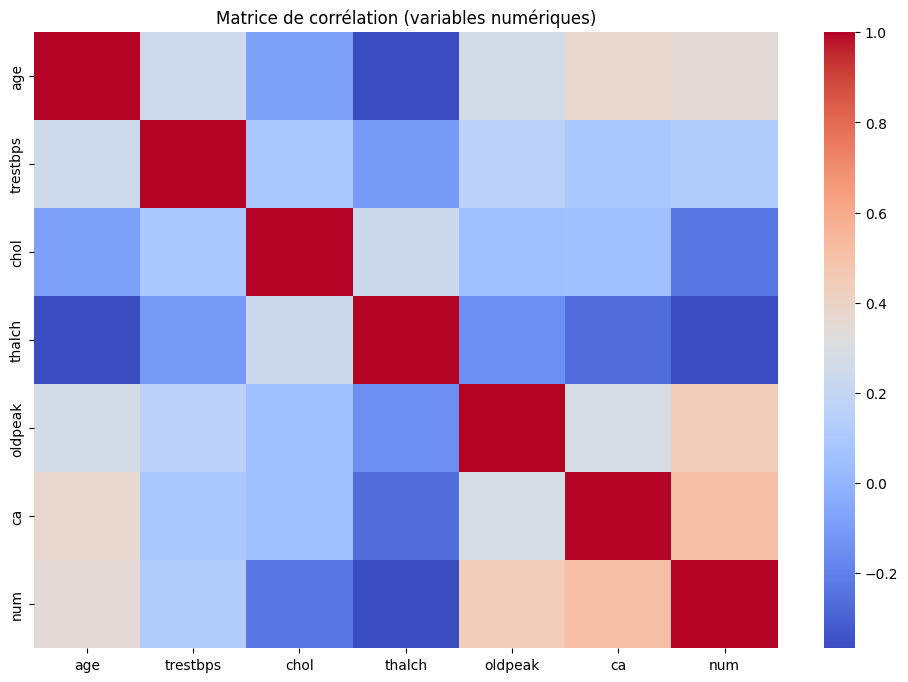

In [26]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()


Corrélations fortes:

Certaines variables présentent des corrélations relativement élevées, indiquant une relation importante entre elles.

Redondances possibles:

Des variables corrélées peuvent contenir une information similaire, ce qui peut créer de la redondance dans les modèles.

Impact sur les modèles linéaires:

Les corrélations entre variables peuvent affecter les performances des modèles linéaires, notamment en introduisant de la multicolinéarité.

## Insights clés de l’EDA
